In [9]:
%reset
import xarray as xr
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [10]:
modelRun = 'TOM12_TJ_C1A1'
baseDir = '/gpfs/afm/greenocean/software/runs/'

In [11]:
### python code that, given a model and a dataset type, finds the first and last year 
### it then can make a list of model output of that type, which xarray can read

def max_min_yrs(tr, baseDir):
    '''manually find the start and end year of a list of model output 
    for a given run, assuming that ptrc is being output
    needs tr - run name
    baseDir - run directory
    '''
    
    w = glob.glob(f'{baseDir}{tr}/ORCA2_1m_*ptrc*.nc')
    yrs = []
    for i in range(0,len(w)):
        ts = (w[i])
        pattern = f'{baseDir}{tr}/ORCA2_1m_'
        mod_string = re.sub(pattern, '', ts)
        yrs.append(int(mod_string[0:4]))
        
    tmin = min(yrs); tmax = max(yrs)
    return tmin, tmax

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



In [12]:
tmin, tmax = max_min_yrs(modelRun, baseDir)
ylist_ptrc = make_yearlist(tmin, tmax, 'ptrc', modelRun, baseDir)
ylist_diad = make_yearlist(tmin, tmax, 'diad', modelRun, baseDir)

ds_ptrc = xr.open_mfdataset(ylist_ptrc)

In [13]:
ds_ptrc['BSi']

<xarray.DataArray 'BSi' (time_counter: 24, deptht: 31, y: 149, x: 182)>
dask.array<concatenate, shape=(24, 31, 149, 182), dtype=float32, chunksize=(12, 31, 149, 182), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht         (deptht) float32 4.999938 15.000288 ... 4749.913 5250.2266
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1948-01-16 12:00:00 ... 1949-12-16 1...
Dimensions without coordinates: y, x
Attributes:
    long_name:           Diatoms Si Concentration
    units:               mol/L
    online_operation:    average
    interval_operation:  5760 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 5760 s)

## GOAL:

recreate CAEL's plots with model output

let's look at what we are trying to make:


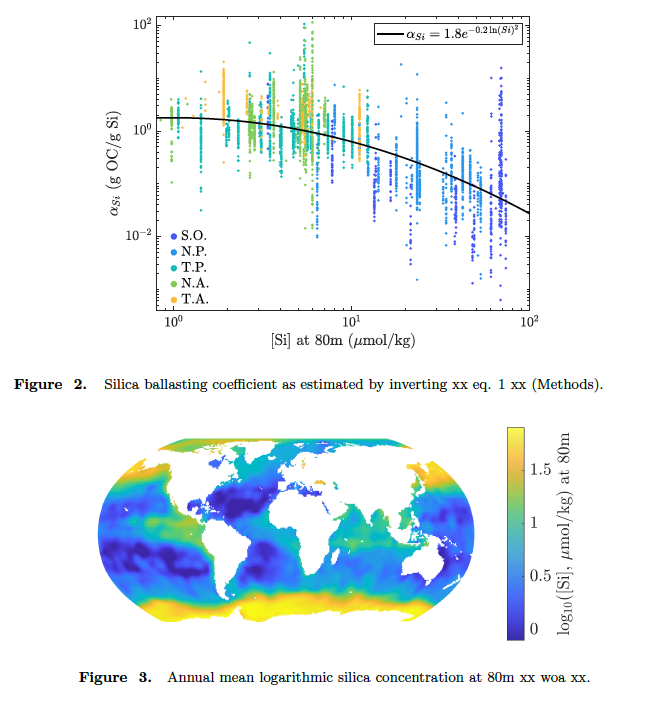

In [17]:
from IPython.display import Image
Image("/gpfs/data/greenocean/TJ_JG_silica/CAELplots/PastedGraphic-2.png")


So for Figure 2 we need:

    - Si, in umol/kg
        From chat with CLQ: I think the corresponding TOM12 output is BSi "Diatoms Si Concentration" in mol/L
        (need to convert to umol/L and then to umol/kg)
    g OC / g Si, dimensionless
        OC: would be POC+GOC? in mol/L > if model currency is carbon then multiply by molar mass of carbon (12g) to get g/L
        Si: as above but convert to grams (molar mass of Silica is?)
    
For Fig 3:
    
    - Si, in umol/kg as above

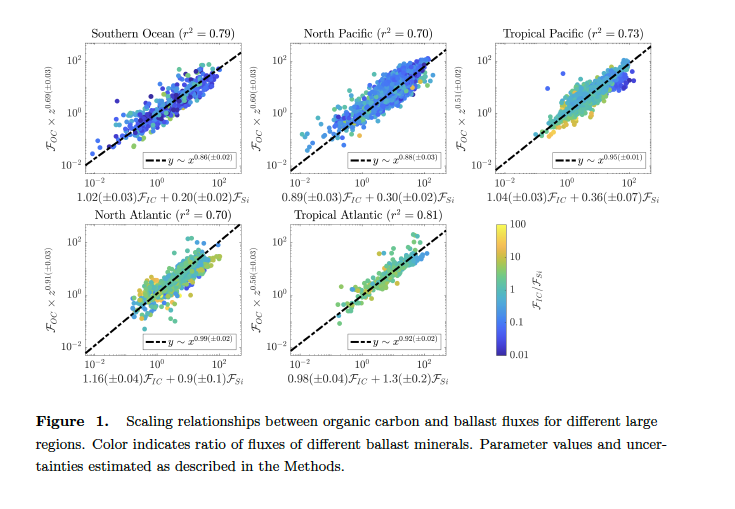

In [18]:
Image("/gpfs/data/greenocean/TJ_JG_silica/CAELplots/PastedGraphic-3.png")

## plot surface jan

Text(0.5, 1.0, 'january 1948, BSi at surface')

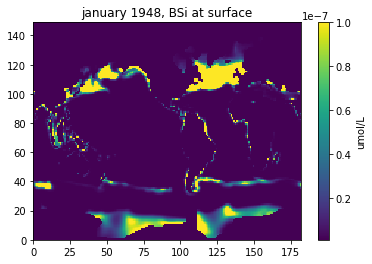

In [25]:
w = plt.pcolormesh(ds_ptrc['BSi'][0,0,:,:].values, vmin = 1e-9, vmax = 1e-7)
plt.colorbar(w, label = 'umol/L')
plt.title('january 1948, BSi at surface')